In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# 1. Load the dataset
file_path = r'Datasets\Pole vault\pole_vault_world_records_world_athletics.csv'
pole_vault = pd.read_csv(file_path)

# 2. Inspect the first few rows to check column names
pole_vault.head()

,Mark,Competitor,DOB,Nationality,Venue,Date
0,6.30,Armand DUPLANTIS,10/11/1999,SWE,"National Stadium, Tokyo (JPN)",15/09/2025
1,6.29,Armand DUPLANTIS,10/11/1999,SWE,"Nemzeti Atlétikai Központ, Budapest (HUN)",12/08/2025
2,6.28,Armand DUPLANTIS,10/11/1999,SWE,"Olympiastadion, Stockholm (SWE)",15/06/2025
3,6.27,Armand DUPLANTIS,10/11/1999,SWE,"Maison des Sports, Clermont-Ferrand (FRA)",28/02/2025
4,6.26,Armand DUPLANTIS,10/11/1999,SWE,"Stadion Śląski, Chorzów (POL)",25/08/2024


C:\Users\vicky\AppData\Local\Temp\ipykernel_25068\2226031488.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  pole_vault['Year'] = pd.to_datetime(pole_vault['Date']).dt.year


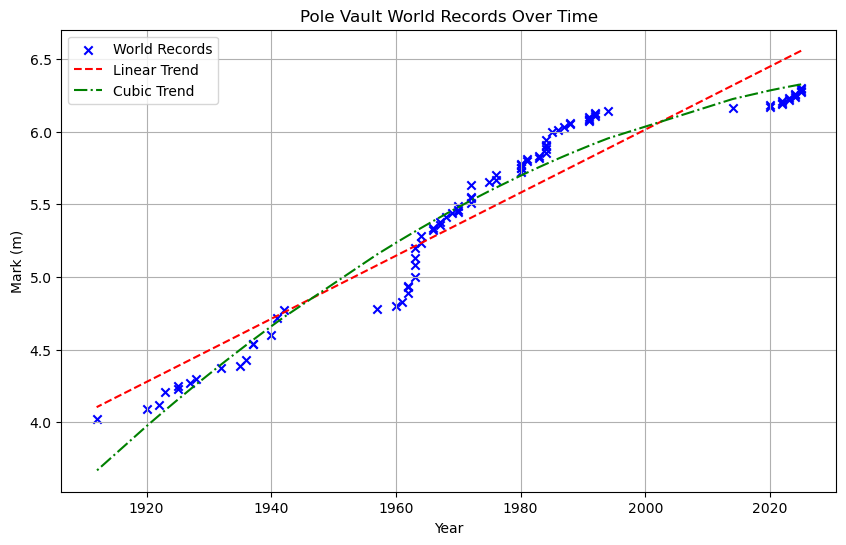

In [3]:
# Convert 'Date' to datetime and extract year
pole_vault['Year'] = pd.to_datetime(pole_vault['Date']).dt.year

# Scatter plot with cross markers
plt.figure(figsize=(10,6))
plt.scatter(pole_vault['Year'], pole_vault['Mark'], color='blue', marker='x', label='World Records')

# Linear trend line (degree 1)
linear_coeffs = np.polyfit(pole_vault['Year'], pole_vault['Mark'], 1)
linear_trend = np.poly1d(linear_coeffs)
plt.plot(pole_vault['Year'], linear_trend(pole_vault['Year']), color='red', linestyle='--', label='Linear Trend')

# Cubic trend line (degree 3)
cubic_coeffs = np.polyfit(pole_vault['Year'], pole_vault['Mark'], 2)
cubic_trend = np.poly1d(cubic_coeffs)
plt.plot(pole_vault['Year'], cubic_trend(pole_vault['Year']), color='green', linestyle='-.', label='Cubic Trend')

# Labels and title
plt.title('Pole Vault World Records Over Time')
plt.xlabel('Year')
plt.ylabel('Mark (m)')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
cutoff_year = 2020  # before Duplantis record era
pole_vault['Date'] = pd.to_datetime(pole_vault['Date'], format='%d/%m/%Y')
pole_vault['Year'] = pole_vault['Date'].dt.year

baseline = pole_vault[pole_vault['Year'] < cutoff_year].copy()
modern = pole_vault[pole_vault['Year'] >= cutoff_year].copy()

In [9]:
coeffs = np.polyfit(baseline['Year'], baseline['Mark'], 2)
expected_model = np.poly1d(coeffs)

In [10]:
expected_model(2025)

7.11003432822443

In [11]:
modern['Expected_Mark'] = expected_model(modern['Year'])
modern['Residual'] = modern['Mark'] - modern['Expected_Mark']

In [12]:
baseline['Residual'] = baseline['Mark'] - expected_model(baseline['Year'])
residual_std = baseline['Residual'].std()

In [13]:
modern['Z_score'] = modern['Residual'] / residual_std

In [14]:
modern[['Competitor', 'Year', 'Mark', 'Expected_Mark', 'Residual', 'Z_score']]

,Competitor,Year,Mark,Expected_Mark,Residual,Z_score
0,Armand DUPLANTIS,2025,6.30,7.110034,-0.810034,-6.162232
1,Armand DUPLANTIS,2025,6.29,7.110034,-0.820034,-6.238306
2,Armand DUPLANTIS,2025,6.28,7.110034,-0.830034,-6.314380
3,Armand DUPLANTIS,2025,6.27,7.110034,-0.840034,-6.390453
4,Armand DUPLANTIS,2024,6.26,7.077512,-0.817512,-6.219118
5,Armand DUPLANTIS,2024,6.25,7.077512,-0.827512,-6.295192
6,Armand DUPLANTIS,2024,6.24,7.077512,-0.837512,-6.371265
7,Armand DUPLANTIS,2023,6.23,7.045059,-0.815059,-6.200459
8,Armand DUPLANTIS,2023,6.22,7.045059,-0.825059,-6.276533
9,Armand DUPLANTIS,2022,6.21,7.012676,-0.802676,-6.106256


In [15]:
bubka_start = 1984
bubka_end = 1994

baseline_pre_bubka = pole_vault[pole_vault['Year'] < bubka_start].copy()
bubka_era = pole_vault[
    (pole_vault['Year'] >= bubka_start) &
    (pole_vault['Year'] <= bubka_end)
].copy()

In [16]:
coeffs_bubka = np.polyfit(baseline_pre_bubka['Year'], baseline_pre_bubka['Mark'], 2)
model_pre_bubka = np.poly1d(coeffs_bubka)

In [17]:
bubka_era['Expected_Mark'] = model_pre_bubka(bubka_era['Year'])
bubka_era['Residual'] = bubka_era['Mark'] - bubka_era['Expected_Mark']

In [18]:
baseline_pre_bubka['Residual'] = (
    baseline_pre_bubka['Mark'] -
    model_pre_bubka(baseline_pre_bubka['Year'])
)

std_pre_bubka = baseline_pre_bubka['Residual'].std()

In [19]:
bubka_era['Z_score'] = bubka_era['Residual'] / std_pre_bubka

In [20]:
bubka_era[['Competitor', 'Year', 'Mark', 'Expected_Mark', 'Residual', 'Z_score']]

,Competitor,Year,Mark,Expected_Mark,Residual,Z_score
15,Sergey BUBKA,1994,6.14,6.377120,-0.237120,-2.268415
16,Sergey BUBKA,1992,6.13,6.285859,-0.155859,-1.491034
17,Sergey BUBKA,1992,6.12,6.285859,-0.165859,-1.586700
18,Sergey BUBKA,1992,6.11,6.285859,-0.175859,-1.682365
19,Sergey BUBKA,1991,6.10,6.240881,-0.140881,-1.347744
20,Sergey BUBKA,1991,6.09,6.240881,-0.150881,-1.443409
21,Sergey BUBKA,1991,6.08,6.240881,-0.160881,-1.539075
22,Sergey BUBKA,1991,6.07,6.240881,-0.170881,-1.634740
23,Sergey BUBKA,1988,6.06,6.108554,-0.048554,-0.464494
24,Sergey BUBKA,1988,6.05,6.108554,-0.058554,-0.560159
